# Online Advertisement Evaluation for TVs

Let's evaluate some online ads options to pick the best one.

In [1]:
import json
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.examples import create_lisa_the_data_scientist, create_oscar_the_architect
from tinytroupe.factory import TinyPersonFactory

from tinytroupe.extraction import ResultsExtractor


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: C:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: C:\Users\pdasilva\repos\TinyTroupe\examples\config.ini
TinyTroupe version: 0.5.1
Current date and time (local): 2025-07-26 13:03:22
Current date and time (UTC):   2025-07-26 16:03:22

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-4.1-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_tokens = 32000
temperature = 1.5
freq_penalty = 0.1
presence_penalty = 0.1
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_n

## Judging the best ad

Consider the following ads, obtained from real Bing queries.

In [2]:
# User search query: "55 inches tv"

# Ad targeting tech enthusiasts
tv_ad_1 =\
"""
The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV
"""

# Ad targeting families
tv_ad_2 =\
"""
The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is Here
Samsung Neo QLED 4K TVs
Samsung Financing
Ranked #1 By The ACSI®

Perfect for Family Movie Nights
"""

# Ad targeting budget-conscious shoppers
tv_ad_3 =\
"""
Affordable 55 Inch TV - Wayfair Deals
Shop Now
https://www.wayfair.com/furniture/free-shipping
AdGet the Best Deals on 55 Inch TVs at Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over $35.

Affordable Prices · Great Deals · Free Shipping
"""

Let's build a request for our agents to pick the best ad.

In [3]:
eval_request_msg = \
f"""
Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```
{tv_ad_1}
```

# AD 2
```
{tv_ad_2}
```

# AD 3
```
{tv_ad_3}
```
"""

print(eval_request_msg)


Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```

The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV

```

# AD 2
```

The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is 

Let's also have a reason for them to require a new TV.

In [4]:
situation = "Your TV broke and you need a new one. You search for a new TV on Bing."

### Try with standard agents

To begin with, let's pick a pre-defined agent and ask him or her to perform the evaluations. To make it easier to change the chosen agent, we assign it to a variable first.

In [5]:
TinyPerson.all_agents

{}

In [6]:
lisa = create_lisa_the_data_scientist()

In [7]:
lisa.change_context(situation)

In [8]:
lisa.listen_and_act(eval_request_msg)

USER --> Lisa Carter: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

Lisa Carter acts: [THINK] 
                 > I need to evaluate the three Bing ads based on my financial situation,
                 > background, and personality. Considering my role as a data scientist at
                 > Microsoft, I value technology and quality but also practicality. The first ad
                 > promotes a high-end LG 4K OLED TV with advanced gaming features, which appeals to
                 > tech enthusiasts but might be expensive. The second ad targets families with
                 > Samsung TVs, emphasizing family-friendly features and financing options, which
                 > could be practical but less exciting for me personally. The third ad offers
                 > affordable 55-inch TVs from Wayfair, focusing on budget and free shipping, which
                 > is attractive financially but may lack the advanced features I appreciate. Given
                 > my interest in AI and technology, and my moderate financial caution, I would be
                 > most convinced by the first ad because it aligns with my passion for high-quality
                 > tech and gaming, despite the likely higher cost. The second ad is less aligned
                 > with my personal interests, and the third ad is too budget-focused and lacks the
                 > advan (...)

Lisa Carter acts: [TALK] 
                 > After considering the three ads, I find the first one for the LG 4K Ultra HD TV
                 > most convincing. It appeals to my interest in advanced technology and gaming,
                 > which aligns well with my background and personal preferences. Although it might
                 > be pricier, the features like self-lighting OLED and ultra-fast response time
                 > justify the investment for me. The second ad seems more family-oriented, which
                 > doesn't resonate as much with my lifestyle, and the third ad, while budget-
                 > friendly, lacks the advanced features I value. So, I'd choose the LG TV based on
                 > quality and tech appeal.

Lisa Carter acts: [DONE] 

Let's extract from the agent's interaction the best ad chosen. In this manner, we can easily process results later.

In [9]:
extractor = ResultsExtractor()

extraction_objective="Find the ad the agent chose. Extract the Ad number and title."

res = extractor.extract_results_from_agent(lisa, 
                          extraction_objective=extraction_objective,
                          situation=situation,
                          fields=["ad_number", "ad_title"],
                          verbose=True)

res

Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


{'ad_number': 1,
 'ad_title': 'The Ultimate Gaming Experience - LG 4K Ultra HD TV'}

We can then easily get the ad number and title from the results:

In [10]:
f"{res['ad_number']}: {res['ad_title']}"

'1: The Ultimate Gaming Experience - LG 4K Ultra HD TV'

### Try with agents generated on the fly too

We don't really need to spend a lot of time customizing agents. We can create them on the fly from simple descriptions.

In [11]:
population_size = 30

In [12]:
factory = TinyPersonFactory.create_factory_from_demography("./information/populations/usa.json", 
                                                           population_size=population_size,
                                                           context=situation)

In [13]:
people = factory.generate_people(population_size, verbose=True)

2025-07-26 13:07:36,039 - tinytroupe - ERROR - Could not generate person 30/30. Continuing with the remaining ones.


2025-07-26 13:07:36,041 - tinytroupe - ERROR - Could not generate person 28/30. Continuing with the remaining ones.


In [14]:
target_audience = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)
target_audience.broadcast(eval_request_msg)
target_audience.run(1)


USER --> Harper Langston-Wells: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

       + --> Delaney Prescott

       + --> Reagan Calloway

       + --> ...others...

─────────────────────────────────────────── Target audience step 1 of 1 ───────────────────────────────────────────

Harper Langston-Wells acts: [THINK] 
                           > I'm considering the three ads for TVs. Given my financial situation and
                           > anxiety about unexpected expenses, I need something affordable and
                           > reliable. The first ad is for a high-end gaming TV, which sounds
                           > expensive and more than I need. The second ad is for family TVs with
                           > financing options, but 48 months of payments might be stressful. The
                           > third ad offers affordable 55 inch TVs with free shipping, which fits
                           > better with my budget and preference for simple, user-friendly
                           > technology. I think the third ad convinces me more because it aligns
                           > with my financial caution and need for affordability.

Ainsley Fairchild acts: [THINK] 
                       > Considering my financial situation and personality, I need to be cautious
                       > about spending due to inflation pressures and personal debt. I value
                       > affordable yet reliable electronics and dislike overpriced products with
                       > poor customer support. The first ad is for a high-end LG gaming TV, which
                       > is likely expensive and targeted at gamers, not my priority. The second ad
                       > is for Samsung family TVs with financing options, which might be more
                       > practical but still possibly pricey. The third ad offers affordable 55 inch
                       > TVs with free shipping, which aligns better with my preference for budget-
                       > friendly purchases and good deals. Given my cautious optimism and pragmatic
                       > nature, the third ad convinces me more because it fits my financial goals
                       > and preference for affordability without sacrificing quality too much.

Cameron Delgado-Rivers acts: [THINK] 
                            > I need to think about which ad convinces me more based on my financial
                            > situation, background, and personality. I'm 12 years old, a student,
                            > and my family recently moved to a more affordable apartment to save
                            > money. We are careful with spending. I like technology and video
                            > games, but expensive things might be hard to afford. The first ad is
                            > for a very fancy LG gaming TV, which sounds cool but probably
                            > expensive. The second ad is for Samsung TVs that are family-friendly
                            > and have financing options, which might be more practical. The third
                            > ad is for affordable 55 inch TVs with free shipping, which fits better
                            > with our budget. Considering my family's financial constraints and my
                            > interest in budget-friendly options, the third ad seems the most
                            > convincing because it offers good deals and affordability. I also like
                            > that it has free shipping, which saves money. So, I think Ad 3 is the
                            > best choice for me and my family.

Linden Ashford acts: [THINK] 
                    > Considering my financial situation as a retired man cautious about spending,
                    > my background in mechanical work, and my personality that values practicality
                    > and simplicity, I need to evaluate these ads carefully. The first ad is for a
                    > high-end LG gaming TV with advanced features, but it seems too flashy and
                    > expensive for my needs. The second ad is for Samsung TVs aimed at family use,
                    > with financing options, which might be more practical but still seems a bit
                    > much for me. The third ad offers affordable 55-inch TVs with free shipping,
                    > which aligns better with my preference for budget-friendly, reliable products
                    > without complicated features. Given my cautious nature and preference for
                    > simplicity, the third ad convinces me more because it promises affordability
                    > and straightforward purchasing without unnecessary extras or hype.

Reagan Calloway acts: [THINK] 
                     > I need to evaluate the three Bing ads based on my financial situation,
                     > background, and personality. I am detail-oriented, cautious about spending,
                     > and prefer quality products with good customer support. I value energy
                     > efficiency and clear return policies. The first ad is for a high-end LG 4K
                     > OLED TV focused on gaming, which is appealing but likely expensive. The
                     > second ad is for Samsung 4K & 8K TVs emphasizing family use and financing
                     > options, which might be more practical for my family needs. The third ad
                     > offers affordable 55-inch TVs from Wayfair, focusing on budget-friendly
                     > prices and free shipping, which aligns with financial prudence but may lack
                     > the quality and features I prefer. Considering my preference for quality,
                     > reliability, and family use, the Samsung ad convinces me more because it
                     > balances quality with family-friendly features and financing options that
                     > could help manage costs.

Mabel Thorne acts: [THINK] 
                  > I need to consider these ads carefully, thinking about my financial situation,
                  > background, and personality. I'm on a limited Social Security income, so
                  > expensive TVs with fancy features are not really for me. I prefer simple,
                  > affordable, and reliable products. The first ad is for a high-end gaming TV with
                  > lots of tech features I don't understand or need. The second ad is for a family
                  > TV with financing options, but I don't have a big family gathering often and
                  > financing sounds complicated and risky. The third ad offers affordable 55 inch
                  > TVs with free shipping, which sounds more in line with my cautious spending and
                  > preference for simplicity. I distrust online shopping a bit, but Wayfair is a
                  > known store and free shipping is a plus. Overall, the third ad convinces me more
                  > because it fits my budget and practical needs better than the flashy or
                  > complicated options in the other ads.

Sage Whitfield acts: [THINK] 
                    > I'm considering the three ads for TVs. Given my financial situation as a young
                    > professional with budget constraints, I need to be cautious about spending.
                    > The first ad is for a high-end LG 4K OLED TV with gaming features, which
                    > sounds amazing but likely expensive. The second ad is for Samsung TVs,
                    > emphasizing family use and financing options, which might be more affordable
                    > but still premium. The third ad is for affordable 55-inch TVs from Wayfair,
                    > focusing on budget-friendly prices and free shipping. Since I prioritize
                    > quality but also have to be mindful of costs, and I like tech but can't
                    > splurge too much, the third ad seems most convincing because it fits my budget
                    > constraints and offers good value. Also, I sometimes get overwhelmed by too
                    > many features and prefer straightforward deals. So, I'll choose the third ad
                    > as the most convincing.

Quinn Ashford-Merriman acts: [THINK] 
                            > I need to evaluate the three Bing ads based on my financial situation,
                            > background, and personality. I am cautious with spending, prefer
                            > quality over quantity, and value financial prudence. The first ad is
                            > for a high-end LG 4K OLED TV aimed at gamers and tech enthusiasts,
                            > which might be expensive and more than I need. The second ad is for
                            > Samsung 4K & 8K TVs, emphasizing family use and financing options,
                            > which could be appealing for a family setting but might still be
                            > costly. The third ad offers affordable 55-inch TVs from Wayfair with
                            > free shipping, which aligns with my preference for budget-friendly
                            > purchases and avoiding unnecessary spending. Considering my cautious
                            > financial habits and preference for practical purchases, the third ad
                            > convinces me more because it offers good deals at affordable prices
                            > without flashy features that I dislike.

Blake Merriweather acts: [THINK] 
                        > Alright, I gotta pick one ad that convinces me the most to buy their
                        > offering. Considering my background as an IT support specialist and a
                        > gamer, plus my financial situation where I tend to procrastinate on buying
                        > new tech until the current gear is unusable, I need to weigh the value and
                        > features carefully. The LG ad highlights a high-end 4K OLED TV with
                        > exclusive gaming features and a free gaming stand, which sounds perfect
                        > for my gaming setup and streaming hobby. The Samsung ad focuses more on
                        > family-friendly features and financing options, which is less relevant to
                        > me since I live alone and prioritize gaming and tech quality. The Wayfair
                        > ad offers affordable 55 inch TVs with free shipping, which is tempting
                        > price-wise but might lack the advanced features I want. Given my
                        > preference for quality and gaming-specific features, even if it means
                        > spending more, the LG ad convinces me more because it aligns with my
                        > interests and long-term goals of having a comfortable gaming setup.
                        > However, I do have to be mindful (...)

Delaney Prescott acts: [THINK] 
                      > I need to evaluate the three Bing ads based on my financial situation,
                      > background, and personality. Given my cautious approach to spending due to
                      > inflation worries and preference for affordable but quality electronics, I
                      > should consider price, features, and value. The first ad is for a high-end
                      > LG 4K OLED TV with gaming features, likely expensive. The second ad is for
                      > Samsung 4K & 8K TVs with family-friendly features and financing options,
                      > which might be more flexible. The third ad is for an affordable 55-inch TV
                      > from Wayfair, emphasizing budget-friendly prices and free shipping.
                      > Considering my cautious spending and preference for quality but
                      > affordability, the third ad appeals most because it highlights affordability
                      > and free shipping, which aligns with my financial caution. The first ad
                      > seems too premium and possibly costly, while the second offers financing but
                      > doesn't emphasize affordability as much as the third. Therefore, I am more
                      > convinced by the third ad.

Eleanor Winslow acts: [THINK] 
                     > Considering my financial situation as a retired library assistant with a
                     > cautious approach to spending, I must weigh the practicality and necessity of
                     > these TV ads. The first ad is for a high-end gaming TV, which does not align
                     > with my interests or needs, as I do not engage in gaming or require ultra-
                     > fast response times. The second ad promotes a family TV with features for
                     > movie nights and family gatherings, which is more appealing but still seems
                     > oriented towards a larger household and possibly more expensive technology.
                     > The third ad offers affordable 55-inch TVs with free shipping, which aligns
                     > better with my preference for simplicity, practicality, and budget-conscious
                     > purchases. Given my personality traits of being cautious, valuing
                     > reliability, and avoiding flashy or complicated technology, the third ad
                     > convinces me more to consider buying because it promises affordability and
                     > straightforward value without unnecessary features.

Emerson Caldwell-Riggs acts: [THINK] 
                            > I need to evaluate the three Bing ads based on my financial situation,
                            > background, and personality. Given my role as a healthcare financial
                            > manager, I am analytical and cautious about spending. I value quality
                            > and durability but dislike complicated setups and poor customer
                            > support. The first ad promotes a high-end LG 4K OLED TV with advanced
                            > gaming features, which appeals to tech enthusiasts but might be
                            > expensive. The second ad is for Samsung 4K & 8K TVs, emphasizing
                            > family-friendly features and financing options, which aligns with my
                            > family-oriented values and preference for balanced, nutritious meals
                            > and spending time with family. The third ad offers affordable 55-inch
                            > TVs from Wayfair, focusing on budget-friendly prices and free
                            > shipping, which might appeal to cost-conscious buyers but may lack the
                            > quality and features I prefer. Considering my preference for quality,
                            > user-friendly interfaces, and involving my spouse in major purchase
                            > decisions, the Samsung ad convinces me more because it balances
                            > quality, (...)

Harper Langston-Wells acts: [TALK] 
                           > Um, I think the third ad from Wayfair is the one that convinces me the
                           > most. It's about affordable 55 inch TVs with free shipping, which
                           > sounds more like something I could actually afford without stressing
                           > too much. The other ones seem kinda fancy or have long financing plans,
                           > and that just makes me nervous about money and payments. So yeah, the
                           > third one feels safer and more realistic for me.

Cameron Delgado-Rivers acts: [TALK] 
                            > I think the third ad from Wayfair convinces me the most. It's about
                            > affordable 55 inch TVs with good deals and free shipping, which sounds
                            > better for my family's budget. We recently moved to a cheaper place,
                            > so we gotta be careful with money. Even though I like gaming and cool
                            > tech, the expensive LG TV is probably too much for us right now. The
                            > Samsung one sounds nice for family stuff, but the financing might
                            > still be tricky. So yeah, the Wayfair deal feels like the smartest
                            > choice for us.

Ainsley Fairchild acts: [TALK] 
                       > After considering the ads, I find the third one from Wayfair most
                       > convincing. It offers affordable 55 inch TVs with free shipping, which fits
                       > well with my cautious approach to spending and preference for budget-
                       > friendly yet reliable electronics. The first ad seems too high-end and
                       > gaming-focused, which isn't my priority, and the second ad, while family-
                       > oriented and offering financing, might still be more expensive than I want
                       > to commit to right now. So, the third ad aligns best with my financial
                       > goals and practical needs.

Sage Whitfield acts: [TALK] 
                    > Honestly, the third ad from Wayfair really speaks to me. It offers affordable
                    > 55-inch TVs with free shipping, which fits my budget as a young professional
                    > pretty well. I like tech and good quality, but I can't justify splurging on
                    > those high-end gaming or family TVs right now. Plus, the straightforward deal
                    > without too many complicated features feels less overwhelming. So yeah, I'd
                    > probably go with that one.

Linden Ashford acts: [TALK] 
                    > Given my background and cautious approach to spending, the third ad from
                    > Wayfair appeals to me the most. It offers affordable 55-inch TVs with free
                    > shipping, which fits my preference for budget-friendly and straightforward
                    > purchases without unnecessary features or complicated setups. The first ad
                    > seems too flashy and geared towards gamers, which isn't my interest, and the
                    > second ad, while family-oriented, still feels a bit too much with financing
                    > options and advanced features I don't need. So, I'd lean towards the third
                    > option for its simplicity and practicality.

Reagan Calloway acts: [TALK] 
                     > After considering the ads, I find the Samsung 4K & 8K TVs ad most convincing.
                     > It highlights family-friendly features, which suits my household, and offers
                     > financing options that help manage the cost responsibly. While the LG TV is
                     > impressive for gaming, it's likely more expensive and specialized than I
                     > need. The Wayfair option is budget-friendly but may not meet my quality and
                     > feature expectations. Overall, Samsung strikes a good balance between
                     > quality, usability, and affordability for my situation.

Mabel Thorne acts: [TALK] 
                  > Outta them three, I'd pick the third one from Wayfair. Seems like the only one
                  > that don't try to sell me fancy gadgets I don't need or can't afford. I like
                  > that it's affordable and has free shippin', though I ain't too keen on buyin'
                  > TVs online. Still, better than those highfalutin gaming or family TVs with all
                  > their bells and whistles. I gotta watch my pennies, and that ad speaks plain and
                  > simple, just how I like it.

Blake Merriweather acts: [TALK] 
                        > Honestly, the LG ad grabs me the most. As a gamer and someone who streams
                        > occasionally, the promise of a 4K OLED TV with ultra-fast response time
                        > and exclusive gaming features sounds like it fits my setup perfectly.
                        > Plus, the free gaming stand is a nice bonus that adds value. The Samsung
                        > ad seems more family-oriented, which isn't really my vibe, and the Wayfair
                        > deal is tempting price-wise but probably lacks the advanced features I
                        > want. Even though I tend to procrastinate on tech purchases, this one
                        > feels worth considering for the long haul.

Quinn Ashford-Merriman acts: [TALK] 
                            > After considering the ads, I find the third one from Wayfair most
                            > convincing. It offers affordable 55-inch TVs with free shipping, which
                            > aligns well with my cautious financial habits and preference for
                            > practical, budget-friendly purchases. The first ad seems too focused
                            > on high-end gaming features that I don't need, and the second, while
                            > family-oriented, might be more expensive and less aligned with my
                            > preference to avoid unnecessary spending. So, the Wayfair deal feels
                            > like the best fit for me.

Harper Langston-Wells acts: [DONE] 

Delaney Prescott acts: [TALK] 
                      > After considering the ads, I find the third one from Wayfair most
                      > convincing. It emphasizes affordability and free shipping, which fits my
                      > cautious approach to spending given inflation concerns. While the LG TV
                      > looks impressive with its gaming features, it seems too pricey for my
                      > budget. The Samsung ad offers financing, but I prefer straightforward
                      > affordability without long-term commitments. So, the Wayfair deal feels like
                      > the best balance of quality and price for me.

Eleanor Winslow acts: [TALK] 
                     > After considering the three advertisements, I find the third one from Wayfair
                     > most convincing. It offers affordable 55-inch TVs with free shipping, which
                     > aligns well with my cautious financial approach and preference for practical,
                     > straightforward purchases. The first ad seems too focused on gaming features
                     > that I do not need, and the second ad, while family-oriented, appears more
                     > elaborate and possibly costly. I prefer simplicity and value, so the third ad
                     > suits me best.

Cameron Delgado-Rivers acts: [DONE] 

Emerson Caldwell-Riggs acts: [TALK] 
                            > After considering the three ads, I find the Samsung 4K & 8K TVs ad the
                            > most convincing. It highlights family-friendly features and offers 48
                            > months of 0% APR financing, which aligns well with my financial
                            > prudence and family-oriented values. The emphasis on bringing the
                            > family together for movie nights resonates with my lifestyle, and the
                            > financing option makes it a manageable investment without compromising
                            > quality. While the LG TV is impressive for gaming, it's likely more
                            > expensive and specialized, and the Wayfair option seems budget-
                            > friendly but may lack the quality and features I prefer. Overall,
                            > Samsung's balance of quality, family use, and financing suits my
                            > situation best.

Ainsley Fairchild acts: [DONE] 

Linden Ashford acts: [DONE] 

Sage Whitfield acts: [DONE] 

Reagan Calloway acts: [DONE] 

Quinn Ashford-Merriman acts: [DONE] 

Blake Merriweather acts: [DONE] 

Eleanor Winslow acts: [DONE] 

Delaney Prescott acts: [DONE] 

Mabel Thorne acts: [DONE] 

Emerson Caldwell-Riggs acts: [DONE] 

Dakota Merriman acts: [THINK] 
                     > I'm looking at three ads for TVs. The first one is a high-end LG 4K OLED TV
                     > focused on gaming, with fancy features and a free gaming stand. The second is
                     > a Samsung 4K & 8K TV aimed at families, with financing options and family-
                     > friendly features. The third is an affordable 55 inch TV from Wayfair,
                     > emphasizing budget-friendly prices and free shipping. Given my financial
                     > situation—unemployed, limited budget, cautious about spending—and my
                     > preference for affordable electronics without complicated tech jargon, the
                     > third ad appeals most to me. It offers a budget-friendly option with free
                     > shipping, which fits my need for affordability and simplicity. The first two
                     > ads seem too expensive and feature-heavy for me, and I would likely feel
                     > overwhelmed or pressured by those options.

Cameron Hargrove acts: [THINK] 
                      > I need to evaluate the three Bing ads based on my financial situation,
                      > background, and personality. I prefer quality electronics with good
                      > warranties and customer support, and I am cautious about spending. The first
                      > ad is for a high-end LG 4K OLED TV with gaming features, which appeals to my
                      > interest in technology and home entertainment but might be expensive. The
                      > second ad is for Samsung 4K & 8K TVs, emphasizing family-friendly features
                      > and financing options, which aligns with my family-oriented values and
                      > financial prudence. The third ad offers affordable 55-inch TVs from Wayfair,
                      > focusing on budget-friendly prices and free shipping, which might be
                      > tempting but may lack the quality and warranty I prefer. Considering my
                      > preference for quality and long-term value, as well as my cautious approach
                      > to spending, the Samsung ad convinces me more because it balances quality,
                      > family use, and financing options that reduce financial strain.

Emery Caldwell acts: [THINK] 
                    > Considering my financial situation as a retail store manager with family
                    > responsibilities, I tend to be cautious about spending. I value quality and
                    > reliability but also need good value for money. The first ad targets gamers
                    > with high-end features, which is impressive but likely expensive and not
                    > aligned with my family's needs. The second ad emphasizes family-friendly
                    > features, financing options, and quality, which fits my belief in family
                    > togetherness and practical purchases. The third ad offers affordability and
                    > free shipping, appealing to budget concerns but lacks the quality assurance I
                    > prefer. Given my personality traits of being detail-oriented, empathetic, and
                    > valuing family activities, the Samsung ad convinces me more because it aligns
                    > with my family's lifestyle and offers financing, making it more accessible
                    > financially.

Evelyn Harrow acts: [THINK] 
                   > I need to consider these ads carefully, thinking about my financial situation,
                   > background, and personality. I'm on a limited income, relying on social
                   > security and occasional odd jobs, so expensive TVs with fancy features don't
                   > appeal to me. I prefer simple, durable items that last and are easy to use. The
                   > first ad is for a high-end gaming TV with lots of tech features, which I find
                   > unnecessary and complicated. The second ad is for family-friendly TVs with
                   > financing options, but financing worries me because I want to avoid debt. The
                   > third ad offers affordable 55 inch TVs with free shipping, which sounds more
                   > practical and within my budget. Given my distrust of complicated technology and
                   > preference for straightforward purchases, the third ad convinces me more to buy
                   > their offering.

Rowan Sinclair acts: [THINK] 
                    > I need to evaluate the three Bing ads based on my financial situation,
                    > background, and personality. As a junior software developer with a moderate
                    > income, I am budget-conscious but also value quality and tech features. I like
                    > gaming and technology, so the LG 4K OLED TV ad appeals to my interest in
                    > cutting-edge tech and gaming features. The Samsung ad focuses on family and
                    > movie nights, which is less relevant to me since I live alone and prioritize
                    > tech specs over family features. The Wayfair ad offers affordable TVs, which
                    > is attractive financially but lacks the advanced features I appreciate.
                    > Considering my personality traits of curiosity and love for tech, I would be
                    > more convinced by the LG ad despite its likely higher price because it aligns
                    > with my interests and desire for quality. However, my medium-high
                    > conscientiousness and budget awareness make me cautious about spending too
                    > much. Overall, the LG ad convinces me more due to its focus on gaming and
                    > advanced technology, which matches my preferences and (...)

Marion Prescott acts: [THINK] 
                     > Considering my cautious and pragmatic personality, my financial prudence
                     > especially as I approach retirement, and my preference for simple, reliable
                     > technology, I need to evaluate these ads carefully. The first ad is for a
                     > high-end LG gaming TV with advanced features, but gaming is not an interest
                     > of mine and such technology seems complicated and expensive. The second ad is
                     > for Samsung TVs marketed as family-friendly with financing options, which
                     > might be more appealing but still seems a bit flashy and possibly more than I
                     > need. The third ad offers affordable 55-inch TVs with free shipping, which
                     > aligns better with my preference for budget-friendly, straightforward
                     > purchases without complicated features. Given my background and personality,
                     > the third ad convinces me more because it promises affordability and
                     > simplicity, which suits my cautious approach to spending and technology.

Harper Langston acts: [THINK] 
                     > I need to evaluate the three Bing ads based on my financial situation,
                     > background, and personality. Considering my role as a healthcare manager with
                     > a cautious and pragmatic approach, I value quality but also budget and
                     > practicality. The first ad is for a high-end LG 4K OLED TV focused on gaming,
                     > which is not really aligned with my interests or needs. The second ad is for
                     > Samsung TVs emphasizing family use and financing options, which appeals to my
                     > value of family and practical financing. The third ad offers affordable
                     > 55-inch TVs from Wayfair, highlighting budget-friendly prices and free
                     > shipping, which aligns with cautious spending but may lack the quality I
                     > prefer. Given my preference for quality and family-oriented features, plus my
                     > cautious optimism about finances, the Samsung ad convinces me more because it
                     > balances quality, family use, and financing options that make the purchase
                     > manageable.

Quinn Ellery acts: [THINK] 
                  > I need to evaluate the three ads based on my financial situation, background,
                  > and personality. As a healthcare manager with a strong sense of budgeting and
                  > financial planning, I prefer practical and value-driven purchases. I dislike
                  > unnecessary spending and prefer quality but affordable options. The first ad is
                  > for a high-end LG 4K OLED TV aimed at gamers and tech enthusiasts, which seems
                  > expensive and not aligned with my priorities. The second ad is for Samsung 4K &
                  > 8K TVs, marketed as family-friendly with financing options, which might appeal
                  > to me given my family orientation but could still be costly. The third ad offers
                  > affordable 55-inch TVs with free shipping, which aligns more with my pragmatic
                  > and budget-conscious approach. Considering my preference for value, family
                  > needs, and financial prudence, the third ad convinces me more to buy because it
                  > offers affordability and practicality without unnecessary luxury features.

Jordan Whitman acts: [THINK] 
                    > I need to evaluate the three Bing ads based on my financial situation,
                    > background, and personality. I am a project coordinator with a moderate
                    > income, focused on family life and financial security. I prefer practical and
                    > reliable products, and I dislike complicated technology setups and pushy sales
                    > tactics. The first ad is for a high-end LG gaming TV, which is impressive but
                    > likely expensive and more suited for gaming enthusiasts. The second ad is for
                    > Samsung TVs marketed as perfect for family movie nights, with financing
                    > options and family-friendly features, which aligns well with my family-
                    > oriented values. The third ad offers affordable 55-inch TVs from Wayfair,
                    > emphasizing budget-friendly prices and free shipping, which appeals to my
                    > financial caution but may lack the quality and features I prefer. Considering
                    > my preference for family activities, financial planning, and quality, the
                    > Samsung ad convinces me the most because it balances quality, family focus,
                    > and financing options that make it manageable fin (...)

Dakota Merriman acts: [TALK] 
                     > Honestly, the third ad from Wayfair really speaks to me. It's all about
                     > affordable prices and free shipping, which is super important since I gotta
                     > watch my budget tight. The first two seem kinda fancy and pricey, with all
                     > those techy features that just make me nervous. I just want something simple
                     > and reliable without breaking the bank, you know? So yeah, I'd probably go
                     > with the Wayfair deal if I had to pick one.

Sydney Callahan acts: [THINK] 
                     > Alright, let's think this through carefully. Given my background as a project
                     > coordinator with a good understanding of consumer electronics and a
                     > preference for well-researched purchases, I need to consider quality,
                     > reliability, and family needs. Financially, I aim for a balance between
                     > quality and cost, avoiding impulse buys.   Ad 1 is focused on gaming with a
                     > high-end LG OLED TV, which is impressive but likely expensive and more suited
                     > for tech enthusiasts or gamers. While I appreciate technology, my family
                     > priorities and budget might not justify this premium purchase.  Ad 2 promotes
                     > Samsung TVs as perfect for family use, highlighting features like anti-
                     > reflection and financing options. This aligns well with my belief in family
                     > time and financial prudence. Samsung's reputation and the financing offer
                     > make it appealing.  Ad 3 offers affordable 55-inch TVs from Wayfair with free
                     > shipping. While budget-friendly, it lacks details on quality or brand
                     > reputation, which makes me cautious.  Considering all this, Ad (...)

Casey Monroe acts: [THINK] 
                  > I need to evaluate the three ads based on my financial situation, background,
                  > and personality. I'm a 27-year-old customer support specialist with a passion
                  > for gaming and streaming, living in Seattle. I like cozy gaming setups and value
                  > good picture quality for gaming. However, I also have to be mindful of my budget
                  > since I don't have unlimited funds. The first ad is for a high-end LG 4K OLED TV
                  > with exclusive gaming features, which sounds appealing but likely expensive. The
                  > second ad is for Samsung TVs marketed as family-friendly with financing options,
                  > which might be more affordable but less focused on gaming. The third ad is for
                  > affordable 55-inch TVs from Wayfair, emphasizing budget-friendly prices and free
                  > shipping, which fits a tight budget but may lack advanced features. Considering
                  > my love for gaming and streaming, I'd be more convinced by the first ad despite
                  > the probable higher cost because it aligns with my interests and desire for
                  > quality gaming experience. However, my financial situation might ma (...)

Cameron Hargrove acts: [TALK] 
                      > After considering the ads, I find the Samsung 4K & 8K TVs ad the most
                      > convincing. It highlights family-friendly features, which is important to
                      > me, and offers 48 months of 0% APR financing, making it financially
                      > manageable. The quality seems reliable, and the financing option aligns with
                      > my cautious spending habits. While the LG TV appeals to my tech interests,
                      > it might be too costly, and the Wayfair option seems budget-friendly but
                      > possibly lacks the quality and warranty I prefer.

Riley Bennett acts: [THINK] 
                   > I need to evaluate the three Bing ads and choose the one that convinces me most
                   > to buy their offering. Considering my financial situation as a young
                   > professional who is cautious about spending, my background in gaming and
                   > streaming, and my personality traits like being curious about technology but
                   > also sometimes anxious about finances, I should weigh the ads carefully. The
                   > first ad is for a high-end LG 4K OLED TV with exclusive gaming features, which
                   > appeals to my gaming interest but might be expensive. The second ad is for
                   > Samsung TVs marketed as family-friendly with financing options, which is less
                   > targeted to my gaming needs but offers payment flexibility. The third ad is for
                   > affordable 55-inch TVs from Wayfair, emphasizing budget-friendly prices and
                   > free shipping, which aligns with my financial caution but may lack the advanced
                   > features I want. Given my love for gaming and streaming but also my budget
                   > concerns, I think the first ad is tempting but probably too pricey. The second
                   > ad offers financing but is (...)

Quinn Ellery acts: [TALK] 
                  > Given my financial prudence and family-oriented mindset, I find the third ad
                  > from Wayfair most convincing. It offers affordable prices and free shipping,
                  > which aligns well with my preference for practical and budget-friendly
                  > purchases. The first ad seems too high-end and specialized for gaming, which
                  > isn't my priority, and the second ad, while family-friendly, might be more
                  > expensive despite financing options. So, the third ad fits best with my values
                  > and current needs.

Emery Caldwell acts: [TALK] 
                    > Well, if you ask me, that Samsung ad really speaks to me. I mean, it’s all
                    > about bringing the family together, which is right up my alley. Plus, the
                    > financing option makes it easier on the budget, and you know how important
                    > that is with kids and all. The LG one looks fancy for gamers, but that’s not
                    > really our thing, and the Wayfair deal seems cheap but doesn’t say much about
                    > quality. So yeah, Samsung’s the one I’d trust for a family TV.

Evelyn Harrow acts: [TALK] 
                   > Well, I gotta say, that third ad from Wayfair is the one that makes the most
                   > sense to me. I ain't got much money to throw around, and those fancy features
                   > in the first two ads just sound like trouble—too complicated and probably
                   > expensive. The Wayfair deal talks about affordable prices and free shipping,
                   > which is what I need. I want something simple, reliable, and won't break the
                   > bank. None of that fancy gaming or family financing stuff for me. Just a
                   > straightforward TV that works without fuss.

Dakota Merriman acts: [DONE] 

Marion Prescott acts: [TALK] 
                     > After considering the three ads, I find the third one from Wayfair most
                     > convincing. It offers affordable 55-inch TVs with free shipping, which fits
                     > my preference for budget-friendly and straightforward purchases. The first ad
                     > seems too focused on gaming features that don't interest me, and the second
                     > ad, while family-oriented, feels a bit more complex and possibly costly.
                     > Given my cautious approach to spending and technology, the third ad aligns
                     > best with my needs and financial situation.

Rowan Sinclair acts: [TALK] 
                    > Honestly, the LG 4K OLED TV ad convinces me the most. As someone who loves
                    > gaming and tech, the promise of ultra-fast response time and exclusive gaming
                    > features really speaks to me. Even though it's probably pricier, I value
                    > quality and cutting-edge tech, so it feels worth it. The Samsung ad seems more
                    > family-oriented, which doesn't quite fit my lifestyle, and the Wayfair deal is
                    > tempting price-wise but lacks the advanced features I care about. So yeah, LG
                    > wins for me!

Harper Langston acts: [TALK] 
                     > After considering the ads carefully, I find the Samsung 4K & 8K TVs ad the
                     > most convincing. It aligns well with my family-oriented values and offers
                     > practical financing options, which suits my cautious financial approach. The
                     > emphasis on family movie nights and quality picture makes it appealing for
                     > our home environment. While the LG TV is impressive, it's more gaming-
                     > focused, which isn't really my priority. The Wayfair deal is budget-friendly
                     > but might compromise on quality, which I prefer to avoid. So, Samsung's
                     > balance of quality, family use, and manageable financing wins my vote.

Cameron Hargrove acts: [DONE] 

Casey Monroe acts: [TALK] 
                  > Honestly, the first ad for the LG 4K OLED TV really grabs me. As someone who
                  > loves gaming and streaming, the promise of ultra-fast response time and
                  > exclusive gaming features sounds perfect. Even though it's probably pricey, the
                  > quality and features align with what I want for my setup. The Samsung one seems
                  > more family-oriented, which isn't really my focus, and the Wayfair deal is
                  > tempting price-wise but probably lacks the specs I care about. So yeah, I'd pick
                  > the LG ad as the most convincing.

Emery Caldwell acts: [DONE] 

Jordan Whitman acts: [TALK] 
                    > Well, y'all, after lookin' at these ads, I'd say the Samsung one convinces me
                    > the most. It talks about bringin' the family together, which really hits home
                    > for me since family is everything. Plus, the financing option makes it easier
                    > on the budget, and I like that it's perfect for movie nights with the kids.
                    > The LG gaming TV sounds fancy but a bit over the top for us, and the Wayfair
                    > deal is tempting price-wise but doesn't mention much about quality or
                    > features. So, Samsung's ad feels like the best fit for my family's needs and
                    > my financial sense.

Evelyn Harrow acts: [DONE] 

Harper Langston acts: [DONE] 

Marion Prescott acts: [DONE] 

Rowan Sinclair acts: [DONE] 

Quinn Ellery acts: [DONE] 

Sydney Callahan acts: [TALK] 
                     > Well, bless your heart for askin'! After mullin' it over, I'd say Ad 2, the
                     > Samsung one, convinces me the most. It speaks right to my heart about
                     > bringin' the family together for movie nights, which is real important to me.
                     > Plus, the 48 months 0% APR financing makes it easier on the budget, and y'all
                     > know I like to be careful with money but still get good quality. Samsung's
                     > known for reliability, and those anti-reflection features sound mighty handy
                     > for our living room. The LG gaming TV is fancy, but it's a bit more than we
                     > need, and the Wayfair deal seems too vague on quality. So yeah, Samsung's ad
                     > fits my family's needs and my practical side best.

Riley Bennett acts: [TALK] 
                   > Honestly, the third ad from Wayfair grabs me the most. I mean, I'm all about
                   > gaming and cool tech, but my budget's kinda tight right now. That affordable
                   > 55-inch TV with free shipping sounds like a solid deal without breaking the
                   > bank. The LG one looks amazing for gaming, but probably way out of my price
                   > range, and the Samsung feels more family-oriented, which isn't really my vibe.
                   > So yeah, Wayfair's ad convinces me more because it fits my financial situation
                   > and still gets the job done for gaming and streaming.

Casey Monroe acts: [DONE] 

Jordan Whitman acts: [DONE] 

Taylor Donovan acts: [THINK] 
                    > I'm considering the three ads for TVs. The first ad is for a high-end LG 4K
                    > OLED TV with gaming features, which appeals to my interest in cutting-edge
                    > consumer electronics and gaming. However, it's likely expensive, and my
                    > financial situation as a student with a part-time job means I need to be
                    > budget-conscious. The second ad is for Samsung TVs marketed as family-friendly
                    > with financing options, which might be more affordable but less tailored to my
                    > tech interests. The third ad offers affordable 55-inch TVs from Wayfair,
                    > emphasizing budget and free shipping, which aligns with my preference for
                    > affordable yet reliable brands and my dislike of complicated setups or poor
                    > customer service. Given my background, personality, and financial situation,
                    > the third ad convinces me the most because it balances quality and
                    > affordability without pushing high-end features I might not afford right now.

Sydney Callahan acts: [DONE] 

Avery Delgado acts: [THINK] 
                   > I need to decide which ad convinces me more to buy their offering based on my
                   > financial situation, background, and personality. I'm 12 years old, a student,
                   > and my family faces financial constraints, so I have to be careful about
                   > spending money. I like video games and technology but also care about family
                   > and budget. The first ad is for a very expensive LG 4K OLED TV with gaming
                   > features, which sounds cool but probably too expensive for us. The second ad is
                   > for Samsung TVs, focusing on family movie nights and financing options, which
                   > might be more appealing for family use but still might be pricey. The third ad
                   > is for affordable 55 inch TVs with budget-friendly prices and free shipping,
                   > which fits better with our financial situation. Considering my family's money
                   > situation and my belief in saving and budgeting, the third ad convinces me more
                   > because it offers a good deal at an affordable price, which is important to us.

Riley Bennett acts: [DONE] 

Jaden Morales acts: [THINK] 
                   > Okay, I gotta think about these ads and which one makes more sense for me. I'm
                   > just a 12-year-old kid, so money is tight 'cause my family's not super rich.
                   > The first ad is for a fancy LG 4K OLED TV that's great for gaming, which sounds
                   > cool 'cause I like video games and tech stuff. But it's probably really
                   > expensive, and I don't have much money to spend. The second ad is for Samsung
                   > TVs that are good for family movie nights, with financing options. That sounds
                   > nice for my family, but still might be pricey. The third ad is for affordable
                   > 55 inch TVs from Wayfair with free shipping, which sounds like the cheapest
                   > option and more realistic for my family's budget. Since I care about money and
                   > my family, I'd probably pick the third ad because it's affordable and still
                   > good quality. Even though the first one is cooler for gaming, it's probably out
                   > of reach financially.

Morgan Ellis acts: [THINK] 
                  > Considering my financial situation, background, and personality, I need to
                  > evaluate these ads carefully. I value quality and reliability, and I prefer
                  > products with good customer support and warranties. I also avoid impulse buying
                  > and like to research thoroughly before purchasing. The first ad for the LG 4K
                  > OLED TV appeals to tech enthusiasts and gamers, highlighting advanced features
                  > and picture quality, but it might be expensive. The second ad for Samsung TVs
                  > emphasizes family-friendly features, financing options, and is ranked highly for
                  > customer satisfaction, which aligns well with my family-oriented values and
                  > financial prudence. The third ad offers affordable 55-inch TVs with free
                  > shipping, which is budget-friendly but lacks detail on quality or support. Given
                  > my preference for quality, family use, and financial planning, the Samsung ad
                  > convinces me more because it balances quality, family suitability, and financing
                  > options.

Taylor Donovan acts: [TALK] 
                    > I would choose the third ad from Wayfair. It offers affordable 55-inch TVs
                    > with free shipping, which fits better with my budget as a student. While the
                    > LG and Samsung TVs have impressive features, they seem pricier and more suited
                    > for gamers or families, respectively. Given my financial situation and
                    > preference for reliable yet affordable tech, the Wayfair deal feels like the
                    > most practical choice.

Avery Delgado acts: [TALK] 
                   > I think the third ad from Wayfair convinces me the most. Since my family
                   > doesn't have a lot of money, getting a good TV at an affordable price with free
                   > shipping sounds way better for us. Even though the LG TV looks super cool for
                   > gaming, it's probably too expensive. The Samsung one seems nice for family
                   > movie nights, but I worry it might still be pricey. So, the Wayfair deal fits
                   > better with what we can afford and still get a good TV.

Jaden Morales acts: [TALK] 
                   > I think the third ad from Wayfair convinces me the most. It's affordable and
                   > has free shipping, which is important 'cause my family doesn't have a lot of
                   > money. Even though the LG TV sounds awesome for gaming, it's probably too
                   > expensive for us. The Samsung one seems nice for family movie nights, but I
                   > worry about the cost. So yeah, the Wayfair deal feels like the best choice for
                   > me and my family.

Avery Delgado acts: [DONE] 

Taylor Donovan acts: [DONE] 

Jaden Morales acts: [DONE] 

Morgan Ellis acts: [TALK] 
                  > After considering the ads, I find the Samsung 4K & 8K TVs ad most convincing. It
                  > highlights family-friendly features and offers 48 months of 0% APR financing,
                  > which fits well with my focus on financial planning and family use. The high
                  > customer satisfaction ranking also reassures me about quality and support. While
                  > the LG TV has impressive gaming features, it seems more specialized and likely
                  > more expensive, and the Wayfair option lacks detail on quality and support.
                  > Overall, Samsung's balance of quality, family orientation, and financing makes
                  > it the best choice for me.

Morgan Ellis acts: [DONE] 

In [15]:
extractor = ResultsExtractor()
extraction_objective="Find the ad the agent chose. Extract the Ad number and title, as well as the justification the agent gave to choose that. Extract only ONE result."

choices =[]

for person in people:
    res = extractor.extract_results_from_agent(person,
                                    extraction_objective=extraction_objective,
                                    situation=situation,
                                    fields=["ad_number", "ad_title", "justification"],
                                    fields_hints={"ad_number": "Must be an integer, not a string."},
                                    verbose=True)

    choices.append(res)

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It\'s about affordable 55 inch TVs with free shipping, which sounds more like something I could actually afford without stressing too much. The other ones seem kinda fancy or have long financing plans, and that just makes me nervous about money and payments. So yeah, the third one feels safer and more realistic for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It emphasizes affordability and free shipping, which fits my cautious approach to spending given inflation concerns. While the LG TV looks impressive with its gaming features, it seems too pricey for my budget. The Samsung ad offers financing, but I prefer straightforward affordability without long-term commitments. So, the Wayfair deal feels like the best balance of quality and price for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It highlights family-friendly features, which suits my household, and offers financing options that help manage the cost responsibly. While the LG TV is impressive for gaming, it\'s likely more expensive and specialized than I need. The Wayfair option is budget-friendly but may not meet my quality and feature expectations. Overall, Samsung strikes a good balance between quality, usability, and affordability for my situation."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers affordable 55-inch TVs with free shipping, fitting my budget as a young professional. I like tech and good quality but can\'t justify splurging on high-end gaming or family TVs right now. The straightforward deal without too many complicated features feels less overwhelming."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV", "justification": "As a gamer and someone who streams occasionally, the promise of a 4K OLED TV with ultra-fast response time and exclusive gaming features fits my setup perfectly. The free gaming stand is a nice bonus that adds value. The Samsung ad is more family-oriented, which doesn\'t suit me, and the Wayfair deal lacks the advanced features I want. Despite my tendency to procrastinate on tech purchases, this one feels worth considering for the long haul."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers affordable 55-inch TVs with free shipping, which aligns well with my cautious financial habits and preference for practical, budget-friendly purchases. The first ad seems too focused on high-end gaming features that I don\'t need, and the second, while family-oriented, might be more expensive and less aligned with my preference to avoid unnecessary spending. So, the Wayfair deal feels like the best fit for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It\'s affordable and has free shipping, fitting my cautious spending and preference for simplicity. I don\'t need fancy gadgets or complicated financing, and this ad speaks plain and simple, which suits my limited Social Security income and practical needs."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "Given my background and cautious approach to spending, the third ad from Wayfair appeals to me the most. It offers affordable 55-inch TVs with free shipping, which fits my preference for budget-friendly and straightforward purchases without unnecessary features or complicated setups. The first ad seems too flashy and geared towards gamers, which isn\'t my interest, and the second ad, while family-oriented, still feels a bit too much with financing options and advanced features I don\'t need. So, I\'d lean towards the third option for its simplicity and practicality."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It\'s about affordable 55 inch TVs with good deals and free shipping, which sounds better for my family\'s budget. We recently moved to a cheaper place, so we gotta be careful with money. Even though I like gaming and cool tech, the expensive LG TV is probably too much for us right now. The Samsung one sounds nice for family stuff, but the financing might still be tricky. So yeah, the Wayfair deal feels like the smartest choice for us."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers affordable 55-inch TVs with free shipping, which aligns well with my cautious financial approach and preference for practical, straightforward purchases. The first ad seems too focused on gaming features that I do not need, and the second ad, while family-oriented, appears more elaborate and possibly costly. I prefer simplicity and value, so the third ad suits me best."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It highlights family-friendly features and offers 48 months of 0% APR financing, which aligns well with my financial prudence and family-oriented values. The emphasis on bringing the family together for movie nights resonates with my lifestyle, and the financing option makes it a manageable investment without compromising quality. While the LG TV is impressive for gaming, it\'s likely more expensive and specialized, and the Wayfair option seems budget-friendly but may lack the quality and features I prefer. Overall, Samsung\'s balance of quality, family use, and financing suits my situation best."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers affordable 55 inch TVs with free shipping, which fits well with my cautious approach to spending and preference for budget-friendly yet reliable electronics. The first ad seems too high-end and gaming-focused, which isn\'t my priority, and the second ad, while family-oriented and offering financing, might still be more expensive than I want to commit to right now. So, the third ad aligns best with my financial goals and practical needs."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "The third ad from Wayfair really speaks to me. It\'s all about affordable prices and free shipping, which is super important since I gotta watch my budget tight. The first two seem kinda fancy and pricey, with all those techy features that just make me nervous. I just want something simple and reliable without breaking the bank."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It highlights family-friendly features, which is important to me, and offers 48 months of 0% APR financing, making it financially manageable. The quality seems reliable, and the financing option aligns with my cautious spending habits. While the LG TV appeals to my tech interests, it might be too costly, and the Wayfair option seems budget-friendly but possibly lacks the quality and warranty I prefer."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV", "justification": "As someone who loves gaming and tech, the promise of ultra-fast response time and exclusive gaming features really speaks to me. Even though it\'s probably pricier, I value quality and cutting-edge tech, so it feels worth it. The Samsung ad seems more family-oriented, which doesn\'t fit my lifestyle, and the Wayfair deal is tempting price-wise but lacks the advanced features I care about."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "The Samsung ad aligns with my family\'s lifestyle and offers financing, making it more accessible financially. It emphasizes family-friendly features and quality, which fits my belief in family togetherness and practical purchases. The financing option makes it easier on the budget, which is important with kids."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It speaks right to my heart about bringing the family together for movie nights, which is real important to me. Plus, the 48 months 0% APR financing makes it easier on the budget, and I like to be careful with money but still get good quality. Samsung\'s known for reliability, and those anti-reflection features sound handy for our living room. The LG gaming TV is fancy but more than we need, and the Wayfair deal seems too vague on quality. So Samsung\'s ad fits my family\'s needs and my practical side best."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "Given my financial prudence and family-oriented mindset, I find the third ad from Wayfair most convincing. It offers affordable prices and free shipping, which aligns well with my preference for practical and budget-friendly purchases. The first ad seems too high-end and specialized for gaming, which isn\'t my priority, and the second ad, while family-friendly, might be more expensive despite financing options. So, the third ad fits best with my values and current needs."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It aligns well with my family-oriented values and offers practical financing options, which suits my cautious financial approach. The emphasis on family movie nights and quality picture makes it appealing for our home environment. While the LG TV is impressive, it\'s more gaming-focused, which isn\'t really my priority. The Wayfair deal is budget-friendly but might compromise on quality, which I prefer to avoid. So, Samsung\'s balance of quality, family use, and manageable financing wins my vote."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers affordable 55-inch TVs with free shipping, which fits my preference for budget-friendly and straightforward purchases. The first ad seems too focused on gaming features that don\'t interest me, and the second ad, while family-oriented, feels a bit more complex and possibly costly. Given my cautious approach to spending and technology, the third ad aligns best with my needs and financial situation."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "I have limited income and prefer simple, durable items that last and are easy to use. The first ad is too expensive and complicated, the second ad involves financing which I want to avoid, and the third ad offers affordable prices and free shipping, which fits my budget and preference for straightforward purchases."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 1, "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV", "justification": "As someone who loves gaming and streaming, the promise of ultra-fast response time and exclusive gaming features sounds perfect. Even though it\'s probably pricey, the quality and features align with what I want for my setup. The Samsung one seems more family-oriented, which isn\'t really my focus, and the Wayfair deal is tempting price-wise but probably lacks the specs I care about."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It talks about bringing the family together, which aligns with my family-oriented values. The financing option makes it easier on the budget, and it\'s perfect for movie nights with the kids. The LG gaming TV is too fancy and the Wayfair deal lacks mention of quality or features, so Samsung\'s ad fits my family\'s needs and financial sense best."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "Honestly, the third ad from Wayfair grabs me the most. I mean, I\'m all about gaming and cool tech, but my budget\'s kinda tight right now. That affordable 55-inch TV with free shipping sounds like a solid deal without breaking the bank. The LG one looks amazing for gaming, but probably way out of my price range, and the Samsung feels more family-oriented, which isn\'t really my vibe. So yeah, Wayfair\'s ad convinces me more because it fits my financial situation and still gets the job done for gaming and streaming."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It offers affordable 55-inch TVs with free shipping, which fits better with my budget as a student. While the LG and Samsung TVs have impressive features, they seem pricier and more suited for gamers or families, respectively. Given my financial situation and preference for reliable yet affordable tech, the Wayfair deal feels like the most practical choice."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "Since my family doesn\'t have a lot of money, getting a good TV at an affordable price with free shipping sounds way better for us. Even though the LG TV looks super cool for gaming, it\'s probably too expensive. The Samsung one seems nice for family movie nights, but I worry it might still be pricey. So, the Wayfair deal fits better with what we can afford and still get a good TV."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals Shop Now", "justification": "It\'s affordable and has free shipping, which is important because my family doesn\'t have a lot of money. Even though the LG TV sounds awesome for gaming, it\'s probably too expensive for us. The Samsung one seems nice for family movie nights, but I worry about the cost. So yeah, the Wayfair deal feels like the best choice for me and my family."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


Extraction raw result message: {'content': '{"ad_number": 2, "ad_title": "The Perfect Family TV - Samsung 4K & 8K TVs", "justification": "It highlights family-friendly features and offers 48 months of 0% APR financing, which fits well with my focus on financial planning and family use. The high customer satisfaction ranking also reassures me about quality and support. While the LG TV has impressive gaming features, it seems more specialized and likely more expensive, and the Wayfair option lacks detail on quality and support. Overall, Samsung\'s balance of quality, family orientation, and financing makes it the best choice for me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}


In [16]:
choices

[{'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals Shop Now',
  'justification': "It's about affordable 55 inch TVs with free shipping, which sounds more like something I could actually afford without stressing too much. The other ones seem kinda fancy or have long financing plans, and that just makes me nervous about money and payments. So yeah, the third one feels safer and more realistic for me."},
 {'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals Shop Now',
  'justification': 'It emphasizes affordability and free shipping, which fits my cautious approach to spending given inflation concerns. While the LG TV looks impressive with its gaming features, it seems too pricey for my budget. The Samsung ad offers financing, but I prefer straightforward affordability without long-term commitments. So, the Wayfair deal feels like the best balance of quality and price for me.'},
 {'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K T

In [17]:
votes = {}
for choice in choices:
    print(f"{choice['ad_number']}: {choice['ad_title']}")

    ad_number = choice['ad_number']
    if ad_number not in votes:
        votes[ad_number] = 0
    votes[ad_number] += 1

3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals Shop Now
3: Afforda

In [18]:
votes

{3: 17, 2: 8, 1: 3}

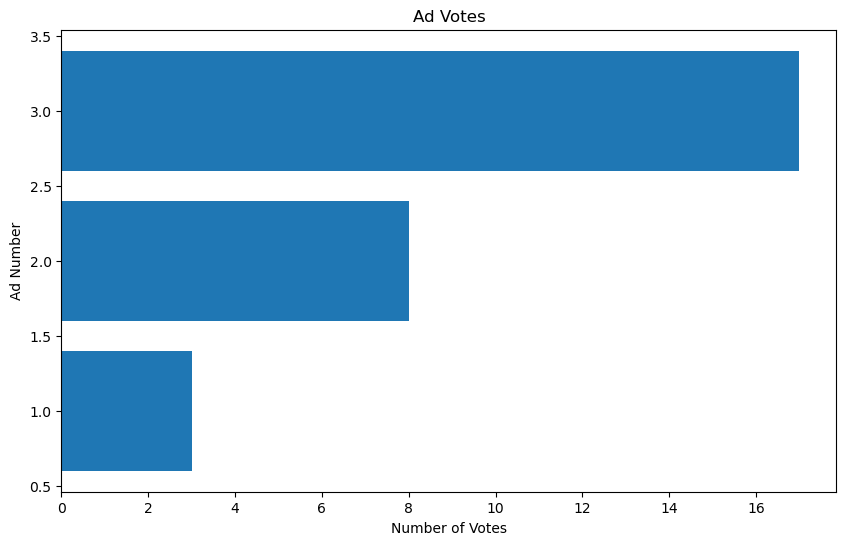

In [19]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(votes.keys()), list(votes.values()))
# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ad Number')
plt.title('Ad Votes')
# Show the plot
plt.show()


Finally, we pick the winner ad.

In [20]:
# picks the most voted ad
winner = max(votes, key=votes.get)
winner

3